# Исследование объявлений о продаже квартир

В нашем распоряжении имеется база данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.


###  Описание данных

По каждой квартире на продажу доступны два вида данных: 1) вписанные пользователем и 2) полученные автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма). Ниже приведены столбцы таблицы с данными о квартирах и их описание.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.


### Задача: 
- Установить параметры, которые помогут в определении рыночной стоимости недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

 

### 1.  Общая информация

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)


In [361]:
data_flat.info()
data_flat.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [362]:
data_flat.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

### Вывод

Перед нами датафрейм размером в 23699 строк и 22 столбца. 

В 14 столбцах содержатся пропущенные значения. Отметим наиболее многчисленные из них. 
- Лидером по числу пропущенных значений является столбец 'is_apartment' с информаций о статусе апартаментов у помещения (булев тип). Возможно, это ошибка при выгрузке данных в ситуации, когда пользователи не указали статус. Мы вряд ли сможем по косвенным признакам через другие параметры определить статус апартаментов. Будем считать эти помещения квартирами, так как апартаменты не являются широко распространенным явлением.

- Далее в порядке убывания идут столбцы 'parks_nearest' (15620 пропусков), 'ponds_nearest' (14589 пропусков), 'balcony' (11519 пропусков). В этом случае пропуски будем считать показетелем отсутствия парков, водоемов и балконов. Заменим только балконы на 0.

- Столбец 'ceiling_height' содержит ощутимое количество пропусков - 9195.  Однако категория данной переменнй вряд ли позволит считать пропуски отсутствием комнат либо игнорировать их. Данный столбец потребует работы по поиску обоснованной замены пропущенным значениям. Пропуски, скорее всего, обусловлены ошибками в выгрузке данных.

- Столбцы 'airports_nearest', cityCenters_nearest также имеют большое количество пропущенных значений. Вероятно, ошибка Яндекса в определении расстояния до ближашего аэропорта/центра города, либо в выгрузке данных - оставим данные пропуски, т.к. мы не можем вывести по косвенным признакам из других столбцов и по другим закономерностям.

- Пропуски в столбцах 'parks_around3000' и 'ponds_around3000' могут быть обусловлены отсутствием парков и водоемов в ближайших 3000 метрах. Заполнять их так же не представляется правильным.

- Пропуски в столбцах 'days_exposition' так же вряд ли можно обоснованно заменить, однако над пропусками в 'kitchen_area', 'living_area' можно поискать варианты.
- Пропуски в столбцах 'floors_total' и 'locality_name' вряд ли можно обоснованно заменить, но их и не так много - 135 шт.

Итого, заполнять пропуски будем в:
- 'is_apartment'
- 'balcony'
- 'ceiling_height'
- 'living_area'
- 'kitchen_area'









### 2. Предобработка данных

#### 2.1. Выполним замену пропущенных значений

In [363]:
#замена пропусков в столбце 'is_apartment' на False
data_flat['is_apartment'] = data_flat['is_apartment'].fillna('False')
#замена пропусков в столбце 'balcony' на 0
data_flat['balcony'] = data_flat['balcony'].fillna(0)
#замена пропусков в столбце 'ceiling_height'. После выведения описания столбца видно, что по длине потолка среднее значение
# около 2.7 м. Примем это за основу для замены пропущенных значений
data_flat['ceiling_height'].describe()
data_flat['ceiling_height'] = data_flat['ceiling_height'].fillna(2.7)

In [364]:
#вычислим пропущенные значения 'living_area' там, где это возможно найти путем 'total_area' - 'kitchen_area' 
good_live = (data_flat['living_area'].isnull()) & ~(data_flat['kitchen_area'].isnull())
data_flat.loc[good_live,'living_area'] = data_flat[good_live]['living_area'].fillna(data_flat['total_area'] - data_flat['kitchen_area'])
#проделаем то же самое для 'kitchen_area'
good_kitchen = (data_flat['kitchen_area'].isnull()) & ~(data_flat['living_area'].isnull())
data_flat.loc[good_kitchen,'kitchen_area'] = data_flat[good_kitchen]['kitchen_area'].fillna(data_flat['total_area'] - data_flat['living_area'])

In [365]:
#проверим сколько пропущенных значений удалось заменить
data_flat.isnull().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             1464
living_area              1464
floors_total               86
locality_name              49
ceiling_height              0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
studio                      0
floor                       0
is_apartment                0
open_plan                   0
balcony                     0
total_images                0
dtype: int64

#### 2.2. Выполним замену типа данных и удалим дубликаты

In [366]:
#приведем к форматц "дата" столбец 'first_day_exposition'
data_flat['first_day_exposition'] = pd.to_datetime(data_flat['first_day_exposition'])

#приведем к целочисленному значению столбцы ниже
data_flat['balcony'] = data_flat['balcony'].astype('int')
data_flat['floors_total'] = data_flat['floors_total'].astype('Int64')
data_flat['parks_around3000'] = data_flat['parks_around3000'].astype('Int64')
data_flat['parks_nearest'] = data_flat['parks_nearest'].astype('Int64')
data_flat['ponds_nearest'] = data_flat['ponds_nearest'].astype('Int64')
data_flat['cityCenters_nearest'] = data_flat['cityCenters_nearest'].astype('Int64')

#некоторые столбцы с большими числами поделим на 1000 для упрощения
data_flat['cityCenters_nearest'] = data_flat['cityCenters_nearest'] / 1000
data_flat['airports_nearest'] = data_flat['airports_nearest'] / 1000
data_flat['last_price'] = data_flat['last_price'] / 1000

data_flat.duplicated().sum() # дубликаты отсутствуют в данном датафрейме

data_flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18.863,16.028,1,482,2.0,755,NaN
1,7,3350.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12.817,18.603,0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21.741,13.933,1,90,2.0,574,558.0
3,0,64900.0,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28.098,6.800,2,84,3.0,234,424.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31.856,8.098,2,112,1.0,48,121.0


#### Вывод:
##### 1. Пропуски
- Полностью были заменены пропуски в 'is_apartment', 'balcony' и 'ceiling_height'. 
- В 'living_area' и 'kitchen_area' пропуски были заменены частично путем нахождения значения разницей с общем общей площадью и соответствующими значениями площади кухни и жилой площади.
- от замены пропусков в 'floors_total' и 'locality_name' воздержались ввиду их незначительного количества.
- Пропуски в остальных столбцах заменить не представляется возможным. Они скорее сообщают об отсутствии ближайших водоемов, парков и т.д.

##### 2. Замена типа данных
- данные в 'first_day_exposition' были приведены к типу "дата".
- цена в 'last_price' и расстояние 'airports_nearest' и 'cityCenters_neares' были поделены на 1000 (для упрощения).
- дубликаты в датафрейме выявлены не были.
- привели к целочисленному столбцы 'flors_total', 'parks_around_3000', 'ponds_around_3000', 'airports_nearest', 'balcony', за исключением 'days_exposition'.





### Шаг 3. Посчитайте и добавьте в таблицу

In [367]:
data_flat['price_per_square'] = data_flat['last_price'] / data_flat['total_area'] 
data_flat['weekday'] = data_flat['first_day_exposition'].dt.weekday
data_flat['month'] = data_flat['first_day_exposition'].dt.month
data_flat['year'] = data_flat['first_day_exposition'].dt.year
data_flat['living_ratio'] = data_flat['living_area'] / data_flat['total_area']
data_flat['kitchen_ratio'] = data_flat['kitchen_area'] / data_flat['total_area']

#создадим функцию для категоризации этажей

def floor_category(i): 
    if i['floor'] == i['floors_total']:
        return 'последний'
    elif i['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

data_flat['floor_type'] = data_flat.apply(floor_category, axis=1)



###  4. Исследовательский анализ:

######  4.1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы.

- ####  Площадь

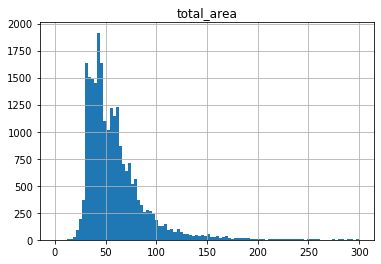

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday,month,year,living_ratio,kitchen_ratio,floor_type
155,8,96000.0,317.0,2017-07-07,4,3.50,3,183.0,3,False,False,False,134.0,1,Санкт-Петербург,22.673,1.771,2,508,3.0,366,62.0,302.839117,4,7,2017,0.577287,0.422713,последний
581,20,65000.0,365.0,2019-03-18,7,2.90,7,NaN,7,False,False,False,NaN,0,Санкт-Петербург,19.827,1.690,3,378,3.0,58,NaN,178.082192,0,3,2019,NaN,NaN,последний
660,3,49950.0,483.9,2017-10-04,7,3.20,6,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23.079,0.945,3,461,3.0,22,391.0,103.223807,2,10,2017,0.645795,0.054557,другой
793,20,135000.0,310.0,2018-05-22,4,3.30,5,250.0,2,False,False,False,50.0,0,Санкт-Петербург,34.159,7.251,2,295,3.0,190,342.0,435.483871,1,5,2018,0.806452,0.161290,другой
866,5,25000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38.076,7.950,0,NaN,2.0,435,418.0,68.870523,5,12,2017,0.611570,0.045730,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20820,7,73900.0,342.0,2015-06-18,5,2.70,4,187.0,2,False,False,False,10.0,0,Санкт-Петербург,25.079,5.544,0,NaN,1.0,251,377.0,216.081871,3,6,2015,0.546784,0.029240,другой
21955,19,130000.0,431.0,2017-10-02,7,3.70,8,220.0,5,False,False,False,20.0,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0,301.624130,0,10,2017,0.510441,0.046404,другой
21990,20,68000.0,373.1,2018-09-08,8,2.70,8,176.2,8,False,False,False,29.4,0,Санкт-Петербург,37.965,7.873,1,562,3.0,691,234.0,182.256768,5,9,2018,0.472259,0.078799,последний
22131,14,27000.0,422.2,2018-10-18,5,2.70,13,NaN,11,False,False,False,NaN,0,Санкт-Петербург,46.625,16.554,0,NaN,0.0,NaN,NaN,63.950734,3,10,2018,NaN,NaN,другой


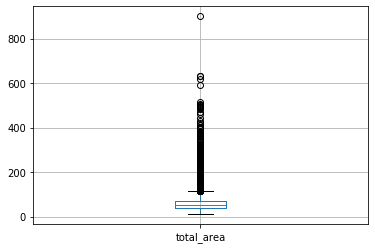

In [368]:
# общая площадь квартиры
data_flat.hist(column='total_area', bins=100, range=(0, 300))
plt.show()
data_flat.boxplot(column='total_area'), data_flat['total_area'].describe()
data_flat.loc[data_flat['total_area'] > 300]

##### Вывод:
- Как из представленных визуализаций, так и описания площади квартир следует, что площадь в нашем датасете в среднем составляет 60 кв. м. На Q3 площадь почти 70 кв. м. Количество квартир свыше 120 кв. м. резко снижается.
- Имеется 61 квартира с площадью более 300 м. Навскидку, судя по количеству комнат, это частные дома либо элитные квартиры в центре. Не будем считать за нереалистичные "выбросы" и оставим. 

- #### Цена

In [369]:
data_flat['last_price'].describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

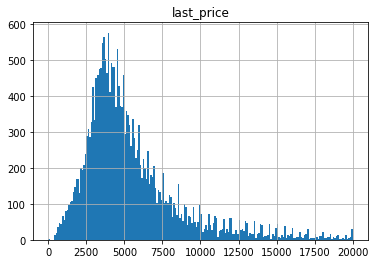

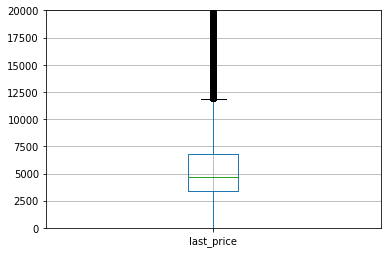

In [370]:
data_flat.hist(column='last_price', bins=200, range=(0, 20000)), 
plt.show()
plt.ylim(0, 20000)
data_flat.boxplot(column='last_price', return_type='axes')

flats_premium = data_flat.query('last_price > 20000') # сохраним в отдельную переменную жилье премиум-класса


##### Вывод
- Описание столбца с ценой говорит, что среднее значение составляет около 6.5 млн. Однако гистограмма и boxplot показывают, что большинство значений выборки распределяются примерно между 2.5 млн и 7.5 млн, тем самым составляя медианное значение примерно 4.7 млн. То есть среднее значение искажено за счет квартир более дорогого сегмента с длинным "хвостом".

- #### Число комнат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday,month,year,living_ratio,kitchen_ratio,floor_type
144,1,2450.0,27.00,2017-03-30,0,2.7,24,15.50,2,False,True,False,11.50,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,90.740741,3,3,2017,0.574074,0.425926,другой
349,4,2320.0,25.00,2017-09-27,0,2.7,14,17.00,1,False,False,True,8.00,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,92.800000,2,9,2017,0.680000,0.320000,первый
440,8,2480.0,27.11,2018-03-12,0,2.7,17,24.75,4,False,True,False,2.36,2,Санкт-Петербург,38.171,15.015,0,NaN,2.0,982,64.0,91.479159,0,3,2018,0.912947,0.087053,другой
508,0,3375.0,34.40,2017-03-28,0,2.7,26,24.30,19,False,False,True,10.10,1,посёлок Парголово,53.115,19.292,0,NaN,1.0,593,430.0,98.110465,1,3,2017,0.706395,0.293605,другой
608,2,1850.0,25.00,2019-02-20,0,2.7,10,NaN,7,False,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,74.000000,2,2,2019,NaN,NaN,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200.0,26.00,2017-09-01,0,2.7,25,18.00,16,False,True,False,8.00,0,Санкт-Петербург,11.405,13.222,0,NaN,1.0,623,14.0,123.076923,4,9,2017,0.692308,0.307692,другой
23442,0,2500.0,27.70,2017-09-28,0,2.7,24,18.00,4,False,False,True,9.70,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,90.252708,3,9,2017,0.649819,0.350181,другой
23554,15,3350.0,26.00,2018-09-07,0,2.7,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18.090,17.092,0,NaN,2.0,112,31.0,128.846154,4,9,2018,NaN,NaN,другой
23592,10,1450.0,29.00,2017-11-11,0,2.7,9,18.00,8,False,False,True,11.00,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,50.000000,5,11,2017,0.620690,0.379310,другой


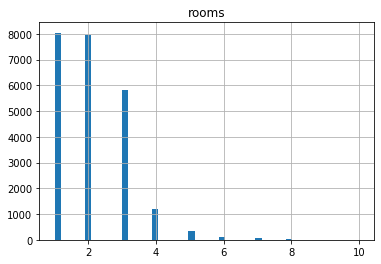

In [371]:
data_flat.hist(column='rooms', bins=50, range=(1, 10))
data_flat['rooms'].describe()
data_flat[data_flat['rooms'] == 0]

##### Вывод
- Гистограмма и описание параметра комнатам показывает, что большинство квартир продаются 1-, 2-. и 3-х комнатные. При этом 1- и 2-х комнатных на рынке примерно 50/50. Далее с небольшим отрывом идут трехкомнатные. Предложение квартир с большим количеством комнат достаточно мало.
- Было обнаружено аномальное значение "0 комнат" в количестве 197 строк. При выведении датафрейма выяснилось, что это большей частью студии.

- #### Высота потолков

In [372]:
data_flat['ceiling_height'].describe()
data_flat[data_flat['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday,month,year,living_ratio,kitchen_ratio,floor_type
355,17,3600.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,23.2,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,65.217391,3,7,2018,0.579710,0.420290,другой
3148,14,2900.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.666667,0,11,2018,0.706667,0.106667,другой
4643,0,4300.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12.016,13.256,1,658,1.0,331,181.0,95.555556,3,2,2018,0.666667,0.155556,другой
4876,7,3000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,8.0,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,120.000000,2,9,2017,0.680000,0.320000,другой
5076,0,3850.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29.686,8.389,3,397,1.0,578,7.0,126.229508,2,10,2018,0.639344,0.180328,первый
5246,0,2500.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,46.296296,4,10,2017,0.555556,0.166667,другой
5669,4,4400.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28.981,10.912,1,305,0.0,NaN,267.0,88.000000,1,8,2017,0.426000,0.140000,другой
5807,17,8150.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18.732,20.444,0,NaN,3.0,80,38.0,101.875000,2,1,2019,0.512500,0.150000,другой
6246,6,3300.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,Кронштадт,68.923,50.649,1,417,2.0,73,NaN,74.324324,0,3,2019,0.704955,0.128378,последний
9379,5,3950.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11.647,13.581,0,NaN,0.0,NaN,NaN,94.047619,6,3,2017,0.714286,0.123810,другой


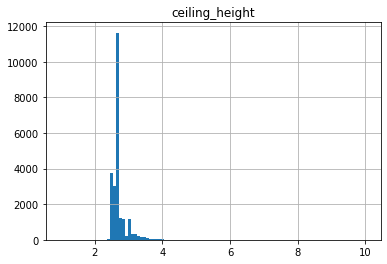

In [373]:
data_flat.hist(column='ceiling_height', bins=100, range=(1, 10))
data_flat.loc[data_flat['ceiling_height'] > 10, 'ceiling_height'] = 2.7

#### Вывод
- Гистограмма и описание покзывают, что среднее значение и большая часть множества потолков имеют высоту в районе 2.7 м.
- В описании высоты потолков были обнаружены аномальные значения - высота потолков свыше 10 м., встречались даже 100 м. Вывели срез данных с потолками больше 10 м., таких оказалось не много (несколько десятков). Была произведена замена на среднее значение - 2.7 м.

#### Изучить время продажи квартиры
- Постройте гистограмму
- Посчитайте среднее и медиану
- Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [374]:
data_flat['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

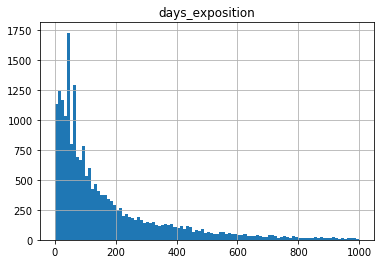

Среднее: 180.88863436982163
Медиана: 95.0


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

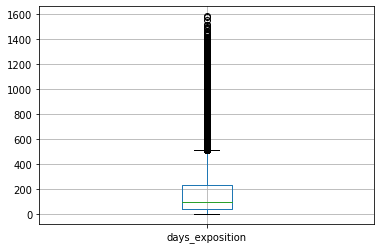

In [375]:
data_flat.hist(column='days_exposition', bins=100, range=(0,1000))
plt.show()
data_flat.boxplot(column=['days_exposition'])
print('Среднее:', data_flat['days_exposition'].mean()) 
print ('Медиана:', data_flat['days_exposition'].median())
data_flat['days_exposition'].describe()

#### Вывод
- Из описания длительности цикла продажи слеует, что среднее время продажи составляет около 180 дней, а медиана - 95 дней. Эту разницу можно объяснить длинным "хвостом" увеличивающегся времени продаж. Из гистограммы видно, что большая часть квартир продается примерно за 100-130 дней. Это можно взять за нормальное вреся продажи. 
- За необычно долгое время продажи можно взять 800 дней.
- Самое раннее объявление было размещено 2014-11-27, самое последнее - 2019-05-03.

#### Убрать редкие и выбивающиеся значения. Описать особенности

In [376]:
#создадим новую переменную good_data, куда начнем помещать данные без "выбросов"

good_data = data_flat.query('last_price <= 15000 and total_area <= 150 and ceiling_height <= 3.5 and rooms <= 5')

mask = (good_data['first_day_exposition'] > '2016-01-01') & (good_data['first_day_exposition'] <= '2019-05-03')
good_data = good_data.loc[mask]
good_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21055 entries, 0 to 23698
Data columns (total 29 columns):
total_images            21055 non-null int64
last_price              21055 non-null float64
total_area              21055 non-null float64
first_day_exposition    21055 non-null datetime64[ns]
rooms                   21055 non-null int64
ceiling_height          21055 non-null float64
floors_total            20981 non-null Int64
living_area             19747 non-null float64
floor                   21055 non-null int64
is_apartment            21055 non-null object
studio                  21055 non-null bool
open_plan               21055 non-null bool
kitchen_area            19747 non-null float64
balcony                 21055 non-null int64
locality_name           21028 non-null object
airports_nearest        15792 non-null float64
cityCenters_nearest     15807 non-null float64
parks_around3000        15808 non-null Int64
parks_nearest           6649 non-null Int64
ponds_around30

##### Вывод
После исследований параметров мы выделили признаки, по которым будет производиться отсечение редких значений:
- площадь до 150 кв. м.
- цена до 15 млн. руб.
- высота потолка менее 3.5 м.
- количество комнат менее 5
- длительость продажи до 800 дней (точкой отсечения была выбрана по дате 2017-01-01 в 'first_day_exposition', так как по переменной 'days_exposition' при фильтрации теряется много строк (скорее всего, из-за NaN)).
- В итоге мы получили для дальнейшей работы датафрейм good_data с количеством строк 21031.


#### Какие факторы больше всего влияют на стоимость квартиры? Исследование зависимостей цены от:
- квадратного метра
- числа комнат
- этажа (первого или последнего) 
- удалённости от центра
- от даты размещения: дня недели, месяца и года

Коэфф. корреляции цены и общей площади: 0.7368618329832083


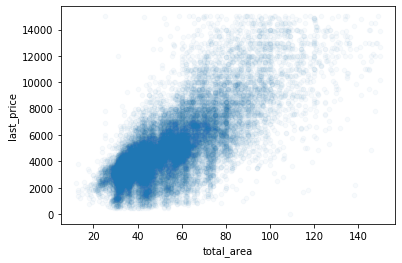

In [377]:
# от квадратного метра
good_data.plot(y='last_price', x='total_area', kind='scatter', alpha=0.03)
print('Коэфф. корреляции цены и общей площади:', good_data['total_area'].corr(good_data['last_price']))

###### Вывод
- График и корреляция показали достаточно сильную зависимость цены от площади квартиры: коэффициент 0.73.

Коэфф. корреляции цены и количества комнат: 0.46871820538893355


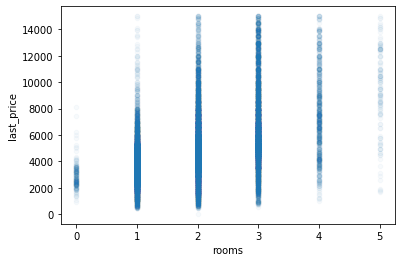

In [378]:
#от числа комнат
good_data.plot(y='last_price', x='rooms', kind='scatter', alpha=0.03)
print('Коэфф. корреляции цены и количества комнат:', good_data['rooms'].corr(good_data['last_price']))

##### Вывод
- Наблюдается определенный рост цены в зависимости от количества комнат, но не всегда. Это касается лишь студий и однокомнатных квартир (1-комнатные определенно дороже, чем студии; 2-комнатные дороже чем 1-к).
- 2-х, 3-х комнатные и далее в цене различаются не так явно.

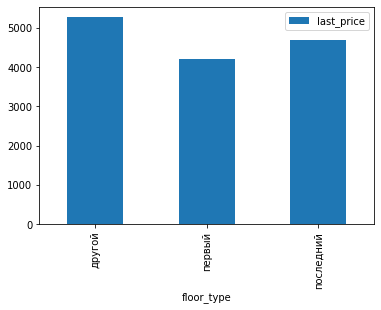

In [379]:
#от типа этажа ("первый", "последний", "другой")
good_data.groupby('floor_type').mean().plot(y='last_price', kind='bar')

##### Вывод
- Наиболее низкая средняя цена на квартиры на первом этаже.
- Чуть более популярные последние этажи.
- Промежуточные этажи наиболее дорогие.

Коэфф. корреляции цены и удаленности от центра: -0.34627549235170585


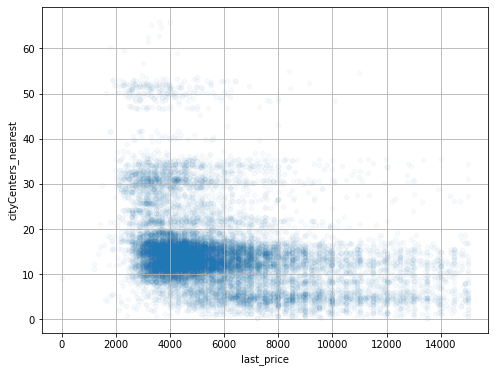

In [380]:
#от удаленности от центра
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', figsize=(8, 6), grid=True, alpha=0.03)
print('Коэфф. корреляции цены и удаленности от центра:', good_data['cityCenters_nearest'].corr(good_data['last_price']))

##### Вывод
- Чем дальше от центра, тем цена ниже.
- Коэффициэнт корелляции цены и удаленности от ценра отрицательный: -0.34

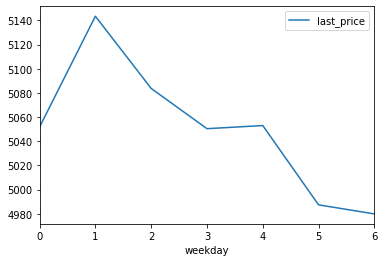

In [381]:
#от даты размещения: дня недели

good_data.groupby('weekday').mean().plot(y='last_price')

##### Вывод
- В объявлениях, размещенных в конце недели (пятница и суббота), цены на квартиры ниже. Пик цен приходится на объявления, размещенные в понедельник и вторник (дни 1 и 2).

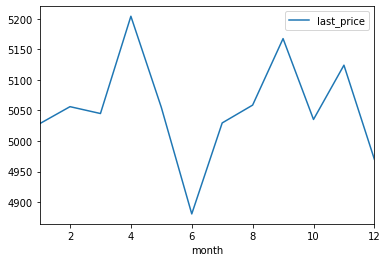

In [382]:
#от месяца размещения
good_data.groupby('month').mean().plot(y='last_price')

##### Вывод
- Цены на квартиры ниже всего летом в июне.

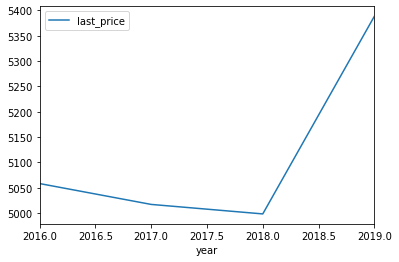

In [383]:
#от года
good_data.groupby('year').mean().plot(y='last_price')

##### Вывод
- До 2018 года цены плавно снижались. После 2018 резко пошли вверх.

#### Задача: населенные пункты с наибольшим числом объявлений
- Выберите 10 населённых пунктов с наибольшим числом объявлений. 
- Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
- Выделите населённые пункты с самой высокой и низкой стоимостью жилья

In [384]:
good_data['locality_name'].value_counts().head(10)
top_10_cities = good_data.query('locality_name == ("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Колпино", "посёлок Парголово", "деревня Кудрово", "Пушкин", "Гатчина", "Выборг")'
)
for i in top_10_cities['locality_name'].unique():
    print(i, ':', 'средняя цена за кв. м', top_10_cities[top_10_cities['locality_name'] == i]['price_per_square'].mean())

Санкт-Петербург : средняя цена за кв. м 107.41566168595286
посёлок Шушары : средняя цена за кв. м 78.80080020821453
посёлок Парголово : средняя цена за кв. м 90.23900328038887
посёлок Мурино : средняя цена за кв. м 86.01665178775733
Пушкин : средняя цена за кв. м 101.40650272369496
деревня Кудрово : средняя цена за кв. м 92.57449065567822
Колпино : средняя цена за кв. м 75.46006469647762
Гатчина : средняя цена за кв. м 68.86942171979778
Выборг : средняя цена за кв. м 58.12657249014338
Всеволожск : средняя цена за кв. м 67.03700597826705


##### Вывод
- Наиболее дорогое жилье в Санкт-Петербурге - в среднем 107 тыс. р. за кв. м.
- Самое дешевое жилье в Выборге - в среднем около 58 тыс. р. за кв. м.

#### Выяснить, какая область входит в центр в Санкт-Петербурге
- Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


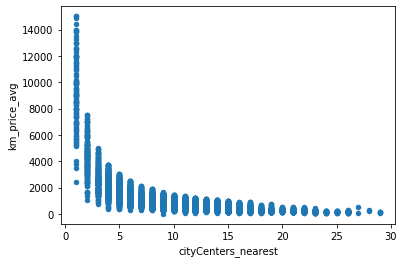

In [385]:
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_data['cityCenters_nearest'] = spb_data['cityCenters_nearest'].round()

spb_data['km_price_avg'] = spb_data['last_price'] / spb_data['cityCenters_nearest']
spb_data.plot(x='cityCenters_nearest', y='km_price_avg', kind='scatter')

##### Вывод
- В Санкт-Петербурге центральной зоной можно считать все в радиусе 2.5 км. от центра, так как на этой отметке цена резко возрастает.

#### Выделите сегмент квартир в центре
Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

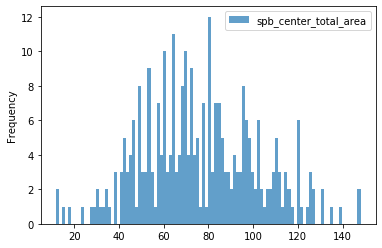

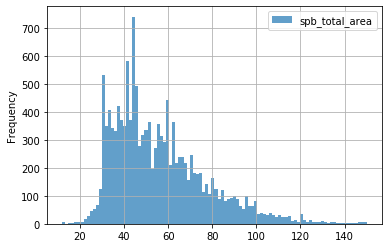

In [386]:
#выделим переменную для квартир в центре
spb_center = spb_data.query('cityCenters_nearest <= 2.5')
ax = spb_center.plot(y='total_area', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_center_total_area')
spb_data.plot(y='total_area', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_total_area', grid=True, legend=True)

##### Вывод
- Распределение площади квартир в центре имеет смещение в сторону ее увелечения и имеет нормальное распределение. В центре средняя площадь квартиры около 80кв. м. При этом в центре одинакого есть спрос как на квартиры небольшой площади, так и на большие квартиры. 

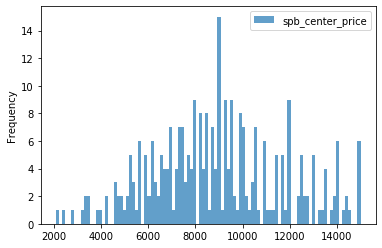

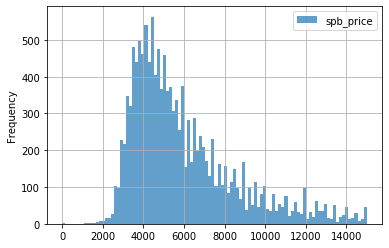

In [387]:
#цена
ax = spb_center.plot(y='last_price', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_center_price')
spb_data.plot(y='last_price', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_price', grid=True, legend=True)

##### Вывод
- Цена, как и площадь, смещена в строну увеличения и имеет распределение, близкое к нормальному. 

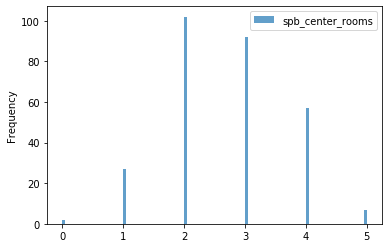

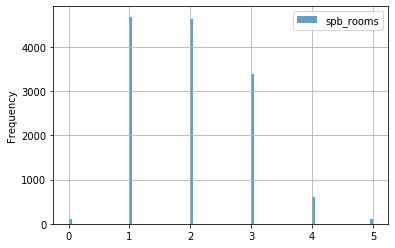

In [388]:
ax = spb_center.plot(y='rooms', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_center_rooms')
spb_data.plot(y='rooms', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_rooms', grid=True, legend=True)

##### Вывод
- В центре на рынок выставляют меньше однокомнатных квартир. При этом 4х комнатные больше пользуются спросом, чем в целом по городу.  

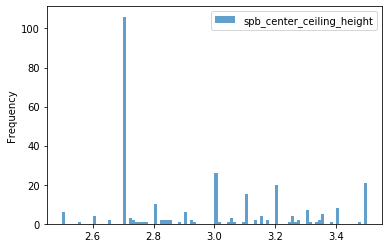

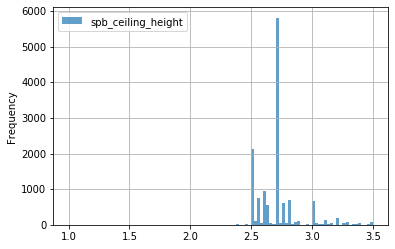

In [389]:
#высота потолков
ax = spb_center.plot(y='ceiling_height', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_center_ceiling_height')
spb_data.plot(y='ceiling_height', kind='hist', histtype='bar', bins=100, linewidth=1.5, alpha=0.7, label='spb_ceiling_height', grid=True, legend=True)

##### Вывод
- В центре потолки высокие, практически нет потолков меньше 2.7 м.

#### Какие факторы влияют на цены в центре

In [390]:

print('Коэфф. корреляции цены и общей площади:', good_data['total_area'].corr(good_data['last_price']))

Коэфф. корреляции цены и общей площади: 0.7368618329832083


Коэфф. корреляции цены и общей площади в СпБ в целом: 0.8126452472055496
Коэфф. корреляции цены и общей площади в СпБ в центре: 0.6529706071092244


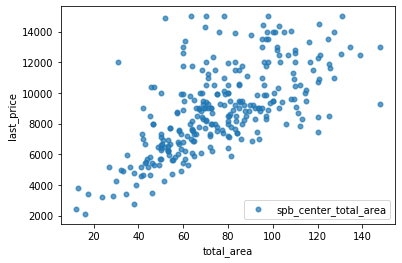

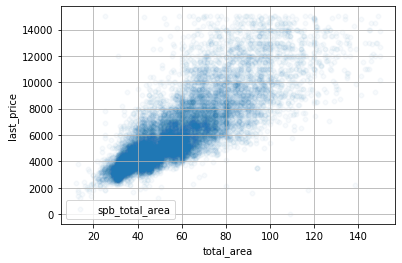

In [391]:
ax = spb_center.plot(y='last_price', x='total_area', kind='scatter', linewidth=1.5, alpha=0.7, label='spb_center_total_area')
spb_data.plot(y='last_price', x='total_area', kind='scatter', linewidth=1.5, alpha=0.03, label='spb_total_area', grid=True, legend=True)

print('Коэфф. корреляции цены и общей площади в СпБ в целом:', spb_data['total_area'].corr(good_data['last_price']))
print('Коэфф. корреляции цены и общей площади в СпБ в центре:', spb_center['total_area'].corr(good_data['last_price']))

##### Вывод
- в центре Санкт-Петербурга коэффициент корреляции (0.65) цены и площади меньше, чем в целом по городу (0.81).

Коэфф. корреляции цены и количества комнат в СпБ в целом: 0.5300815976852062
Коэфф. корреляции цены и количества комнат в СпБ в центре: 0.4769604236407783


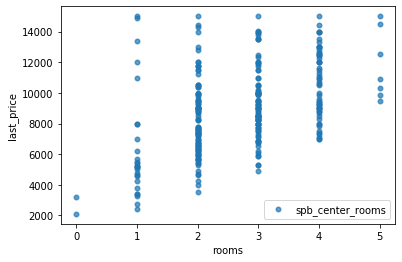

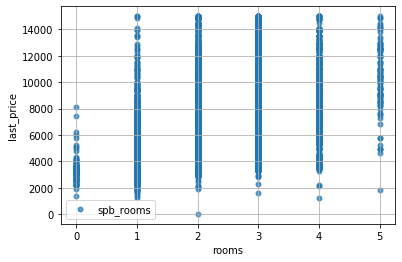

In [392]:
ax = spb_center.plot(y='last_price', x='rooms', kind='scatter', linewidth=1.5, alpha=0.7, label='spb_center_rooms')
spb_data.plot(y='last_price', x='rooms', kind='scatter', linewidth=1.5, alpha=0.7, label='spb_rooms', grid=True, legend=True)

print('Коэфф. корреляции цены и количества комнат в СпБ в целом:', spb_data['rooms'].corr(good_data['last_price']))
print('Коэфф. корреляции цены и количества комнат в СпБ в центре:', spb_center['rooms'].corr(good_data['last_price']))

##### Вывод
- На графиках зависимость цены от количества комнат более сильно выражена для СпБ в целом, чем для выборки квартир в центре. Хотя коэффициент корреляции наоборот наоборот выше для города в целом.

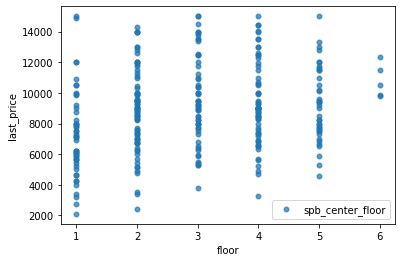

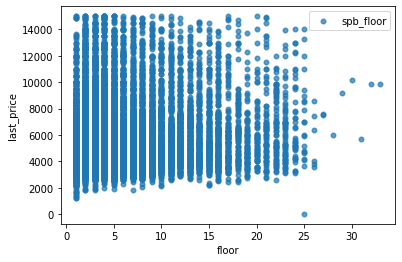

In [393]:
ax = spb_center.plot(x='floor', y='last_price', kind='scatter', linewidth=1.5, alpha=0.7, label='spb_center_floor')
spb_data.plot(x='floor', y='last_price', kind='scatter', linewidth=1.5, alpha=0.7, label='spb_floor')


##### Вывод
- В целом по городу есть небольшая тенденция по увеличению цены с увеличением этажа.
- В центре этажность сама по себе небольшая, поэтому такая тенденция не явная. Хотя первые этажи везде стоят дешевле.

(0, 5)

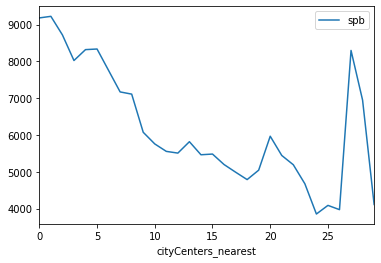

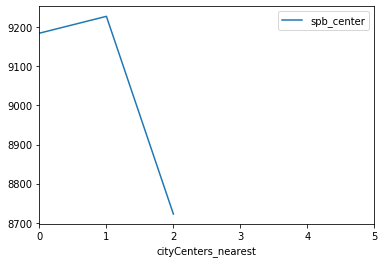

In [394]:
spb_data.groupby('cityCenters_nearest').mean().plot(y='last_price', label='spb')
spb_center.groupby('cityCenters_nearest').mean().plot(y='last_price', label='spb_center')
plt.xlim(0, 5)

##### Вывод
- Средняя цена понижается по мере удаления от центра.

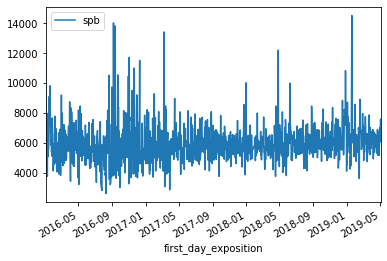

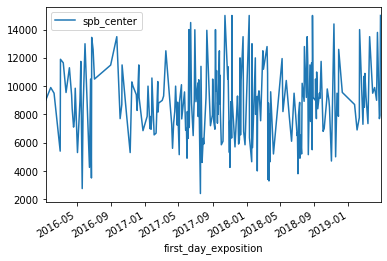

In [399]:
spb_data.groupby('first_day_exposition').mean().plot(y='last_price', label='spb')
spb_center.groupby('first_day_exposition').mean().plot(y='last_price', label='spb_center')

##### Вывод
- Средняя цена на квартиру в центре оставалась относительно более стабильной по сравнению со всем городом в разные периоды размещения объявлений.

### Шаг 5. Общий вывод

- Цена на квартиру напрямую зависит от площади, количества комнат, близости к центру города.
- В Санкт-Петербурге самые дорогие квартиры, а дешевле всего квартира стоит в Выборге.
- Центром Санкт-Петербурга можно считать область в радиусе 2.5 км от центра.
- Cредняя площадь в центре Санкт-Петербурга выше, чем в целом по городу.
- Средняя цена в центре Санкт-Петербурга выше.
- В центре Санкт-Петербурга больше продают 2х, 3х комнатные и 4х комнатные (в отличие от 1 и 2х комнатных на общем фоне) 
- Большая часть квартир в центре Санкт-Петербурга имеет высоту потолков 2.7 м (в отличие от 2.5 и 2.7 на общем фоне).
- В центре Санкт-Петербурга удаленность непосредственно от центра на цену особо не влияет.
- В центре Санкт-Петербурга только малоэтажные здания.
- Средняя общая площадь квартир в центре Санкт-Петербурга выше, чем по городу.